In [25]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import string
import nltk

In [27]:
file = open("C:/Users/Tarun/OneDrive/Desktop/word2vec/Text file for WORD2VEC.txt", "r")
corpus = file.read()
file.close()

print(corpus[:100])

India, a land of vibrant colors, rich cultural heritage, and rapid technological advancements, is a 


In [28]:
corpus = corpus.lower()
print(corpus)

india, a land of vibrant colors, rich cultural heritage, and rapid technological advancements, is a fascinating country that has been at the forefront of innovation and progress. with a history dating back thousands of years, india has a unique cultural identity that is shaped by its diverse traditions, languages, and customs. from the majestic taj mahal to the bustling streets of mumbai, india's cultural landscape is a tapestry of contrasts, where ancient and modern coexist in harmony. the country's technological prowess is equally impressive, with india being a global leader in software development, it services, and innovation. the indian government has been actively promoting science and technology through various initiatives, such as the "digital india" and "startup india" programs, which aim to foster a culture of innovation and entrepreneurship. the country's startup ecosystem is thriving, with numerous startups and unicorns emerging in recent years, and india is now home to some

Remove Punctuations

In [29]:
# to remove punctuations
exclude = string.punctuation

def remove_pun (text):
    return text.translate(str.maketrans("" ,"", exclude))

corpus = remove_pun(corpus)

print(corpus[:20])

india a land of vibr


Remove Stop Words

In [30]:
# Remove stop words

from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords.words("english")

def remove_stop_words(text):
    next_text = []

    for word in text.split():
        if word in stopwords.words("english"):
            next_text.append('')
        else:
            next_text.append(word)
    x = next_text[:]
    next_text.clear()
    return " ".join(x)

corpus = remove_stop_words(corpus)

print(corpus[:100])

india  land  vibrant colors rich cultural heritage  rapid technological advancements   fascinating c


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokernisation

In [31]:
# Tokernisation
from nltk.tokenize import word_tokenize
nltk.download('punkt')

final_corpus = word_tokenize(corpus)

print(final_corpus[:10])

len(final_corpus)

['india', 'land', 'vibrant', 'colors', 'rich', 'cultural', 'heritage', 'rapid', 'technological', 'advancements']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


159

Create Bigrams and Vocalbulary

In [32]:
# Vocalbulary

all_words = final_corpus

all_words = list(set(all_words))

print(len(final_corpus))
print(len(all_words))
print(all_words[:20])

159
123
['science', 'indias', 'vibrant', 'government', 'play', 'institutions', 'prowess', 'years', 'entrepreneurship', 'culture', 'academic', 'global', 'startups', 'literacy', 'landscape', 'india', 'mahal', 'foster', 'levels', 'recognition']


In [33]:
# Bigrams for first 300 words 
length = len(final_corpus)
royaldata = final_corpus
bigrams = []

for i in range (length-1):
    for j in range (i+1 , length):
        bigrams.append([royaldata[i] , royaldata[j]])
        bigrams.append([royaldata[j] , royaldata[i]])

print(len(bigrams))
# print(bigrams)

25122


Apply One hot Encoding

In [34]:
word_dict = {}

counter = 0
for word in all_words:
    word_dict[word] = counter
    counter += 1
print(word_dict) 

{'science': 0, 'indias': 1, 'vibrant': 2, 'government': 3, 'play': 4, 'institutions': 5, 'prowess': 6, 'years': 7, 'entrepreneurship': 8, 'culture': 9, 'academic': 10, 'global': 11, 'startups': 12, 'literacy': 13, 'landscape': 14, 'india': 15, 'mahal': 16, 'foster': 17, 'levels': 18, 'recognition': 19, 'biotechnology': 20, 'role': 21, 'countrys': 22, 'cultural': 23, 'focus': 24, 'education': 25, 'ecosystem': 26, 'overall': 27, 'technology': 28, 'history': 29, 'unique': 30, 'thousands': 31, 'additionally': 32, 'shaped': 33, 'rich': 34, 'renewable': 35, 'ancient': 36, 'digital': 37, 'various': 38, 'gaining': 39, 'customs': 40, 'taj': 41, 'improving': 42, 'institutes': 43, 'also': 44, 'areas': 45, 'excellence': 46, 'coexist': 47, 'progress': 48, 'development': 49, 'intelligence': 50, 'back': 51, 'diverse': 52, 'emerging': 53, 'world': 54, 'impressive': 55, 'iits': 56, 'worlds': 57, 'initiatives': 58, 'energy': 59, 'higher': 60, 'tapestry': 61, 'promoting': 62, 'modern': 63, 'enrollment': 

In [35]:
one_hot_data = np.zeros((len(all_words) , len(all_words)))

for i in range(len(all_words)):
    one_hot_data[i][i] = 1

# print(one_hot_data)

one_hot_dict ={}

for i in range(len(all_words)):
    one_hot_dict[all_words[i]] = one_hot_data[i]


# for word in one_hot_dict :
#     print(word , " " , one_hot_dict[word])

Create Input and Output label

In [36]:
# Creating input and Output 
X = []
Y = []

for bi in bigrams:
    X.append(one_hot_dict[bi[0]])
    Y.append(one_hot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

print(len(X))

25122


In [37]:
print(len(X[0]))
print(len(all_words))

123
123


Here, we creating model using keras (vector length = 2)

In [38]:
# Constructing the NN
from keras.models import Sequential
from keras.layers import Dense , Input
import tensorflow as tf

model = Sequential()

vocal_size = len(all_words)
embed_size = 3

model.add(Input(shape=(vocal_size,)))
model.add(Dense(embed_size , activation= "linear"))
model.add(Dense(vocal_size , activation="softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = "adam" )

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 123)            │           492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 864 (3.38 KB)

 Trainable params: 864 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
testX = X[:1000]
testY = Y[:1000]

In [41]:
model.fit(X , Y , epochs = 1000)

Epoch 1/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.7947
Epoch 2/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7175
Epoch 3/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7055
Epoch 4/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7080
Epoch 5/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7106
Epoch 6/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7143
Epoch 7/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7062
Epoch 8/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7053
Epoch 9/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7044
Epoch 10/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7098
Epoch 11/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7046
Epoch 12/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7116
Epoch 13/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7031
Epoch 14/1000
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7107
Epoch 15/1000
786/786 ━━━━━━━

In [42]:
# Weights extraction and assignment of vectors
weights = model.get_weights()[0]

word_embedding_dict = {}

for word in all_words:
    word_embedding_dict[word] = weights[word_dict[word]]

for word in all_words:
    print(word , ":" , word_embedding_dict[word])

science : [ 0.03203423 -0.04998299 -0.03046256]
indias : [ 0.04855472 -0.03717133 -0.01082015]
vibrant : [ 0.05665389 -0.0240857  -0.00595208]
government : [ 0.05991834 -0.02964426 -0.00168778]
play : [ 0.0572584  -0.04013889  0.00336045]
institutions : [ 0.07127661 -0.04772483  0.01711634]
prowess : [ 0.05298356 -0.04515645 -0.00300968]
years : [ 0.06064541 -0.03955469 -0.00183721]
entrepreneurship : [ 0.04865007 -0.04390711 -0.01189834]
culture : [ 0.03052183 -0.05406711 -0.03116438]
academic : [ 0.0533025  -0.04117413 -0.00439855]
global : [ 0.0429993  -0.03932175 -0.02479103]
startups : [ 0.06969792 -0.03184123  0.01527774]
literacy : [ 0.04399202 -0.04563482 -0.01810322]
landscape : [ 0.05540055 -0.03816207 -0.0077422 ]
india : [ 0.04539473 -0.03638251 -0.01778226]
mahal : [ 0.05276615 -0.04170121 -0.00437837]
foster : [ 0.03936155 -0.05867111 -0.01317416]
levels : [ 0.05635846 -0.04534908 -0.00147345]
recognition : [ 0.04069652 -0.04006299 -0.02119336]
biotechnology : [ 0.0673761

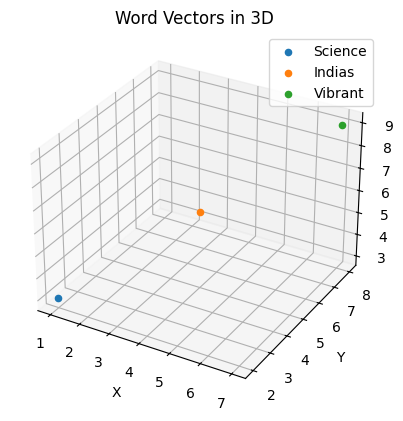

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming you have the 3D word vectors in a dictionary 'word_vectors'
words = list(word_vectors.keys())
vectors = np.array(list(word_vectors.values()))

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the word vectors
for i, word in enumerate(words):
    ax.scatter(vectors[i, 0], vectors[i, 1], vectors[i, 2], label=word)

# Set the title and labels
ax.set_title('Word Vectors in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the legend
ax.legend()

# Show the plot
plt.show()
